In [127]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [129]:
#Load and Read .csv files as Data Frame

train_data = pd.read_csv('./dataset/train_set.csv')
test_data = pd.read_csv('./dataset/test_set.csv')
blind_data = pd.read_csv('./dataset/blinded_test_set.csv')


print(train_data)

print(test_data)

print(blind_data)


print(train_data.shape)

print(test_data.shape)

print(blind_data.shape)

         ID     Feature_1  Feature_2     Feature_3  Feature_4  Feature_5  \
0      ID_1  18281.541667    18432.0   9409.650391   0.514708   0.011300   
1      ID_2  20010.083333    20100.0   8303.049072   0.417707   0.014959   
2      ID_3  27260.125000    27437.0  12189.649414   0.447160   0.011428   
3      ID_4  41938.125000    42138.0  17866.433594   0.426019   0.009908   
4      ID_5  41274.125000    41439.0  14315.041992   0.346828   0.013596   
..      ...           ...        ...           ...        ...        ...   
310  ID_311  46787.916667    47002.0  18052.070312   0.385828   0.010883   
311  ID_312   8420.354167     8493.0   4292.039795   0.510004   0.016911   
312  ID_313  37262.750000    37407.0  13950.793945   0.374390   0.012759   
313  ID_314  25081.833333    25251.0  11689.275391   0.466045   0.011197   
314  ID_315  52925.083333    53137.0  19790.341797   0.373931   0.010725   

     Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_3230  \
0     0.045369   

In [130]:
# Separate features and labels

X_train = train_data.drop("CLASS", axis = 1)  # shape: (n_samples, 3238) -> axis = 1 means operation on columns -> values convert pandas dataframe to numpy arrat
X_train = X_train.drop("ID", axis = 1).values
y_train = train_data["CLASS"].values               # shape: (n_samples,)


X_test = test_data.drop("CLASS", axis = 1)  # shape: (n_samples, 3238) -> axis = 1 means operation on columns -> values convert pandas dataframe to numpy arrat
X_test = X_test.drop("ID", axis = 1).values
y_test = test_data["CLASS"].values               # shape: (n_samples,)

blind_X_test = blind_data.drop("ID", axis = 1).values



print('TRAINING DATA...')
print('Shape of feature data : ',X_train.shape)
print('Shape of output label data : ',y_train.shape)

print('TESTING DATA...')
print('Shape of feature data : ',X_test.shape)
print('Shape of output label data : ',y_test.shape)

print('TESTING DATA...')
print('Shape of feature data : ',blind_X_test.shape)


TRAINING DATA...
Shape of feature data :  (315, 3238)
Shape of output label data :  (315,)
TESTING DATA...
Shape of feature data :  (100, 3238)
Shape of output label data :  (100,)
TESTING DATA...
Shape of feature data :  (36, 3238)


Shapes after dropping invalid rows: (198, 3238) (198,)
Class distribution in y_train: {'0': 106, '1': 92}


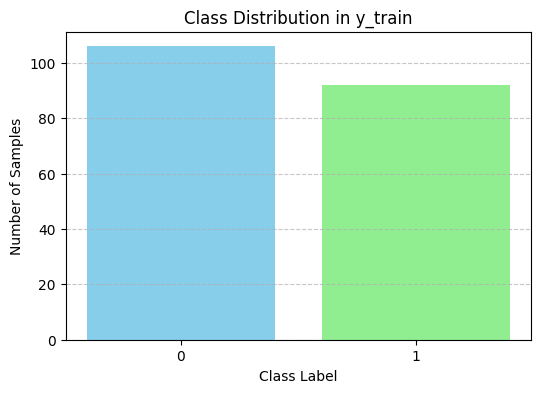

Scaling X_train...
Shapes after dropping invalid rows in test set: (51, 3238) (51,)
Class distribution in y_test: {'1': 25, '0': 26}


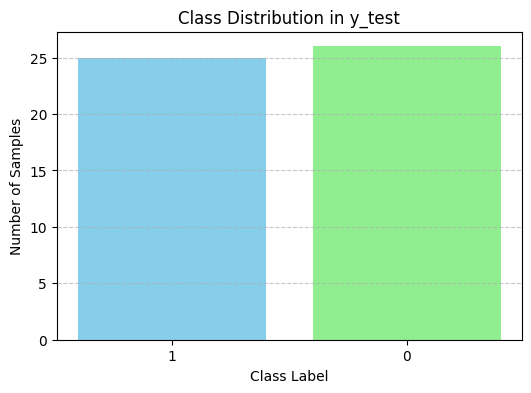

Scaling X_test...
Shapes after dropping invalid rows: (36, 3238)
Scaling X_train...
Shapes :  (36, 3238)
Selecting top 200 features using SelectKBest...
Shape after feature selection: (198, 3238)
Shape after feature selection: (198, 200)
Working with selected features only...


C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [1719 1731 1733 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122
 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2248 2249 2255
 2259 2376 2377 2383 2387 2504 2505 2510 2511 2512 2513 2515 2516 2517
 2632 2633 2639 2640 2643 2758 2759 2760 2761 2762 2763 2764 2765 2766
 2767 2768 2769 2771 2772 2773 2886 2887 2888 2889 2890 2891 2892 2893
 2895 2897 2899 2900 2901 2937 2938 2939 2940 2941 2977 2978 2979 2980
 2981 3096 3097 3103 3106 3224 3225 3231 3234] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value enc

In [131]:


# --- CONFIGURATION ---
dimension_reduction = False  # if you still want PCA after feature selection
k_best_features = 200        # number of top features to keep using SelectKBest





# --- Cleaning and filtering X_train and y_train -------------------------------------------------------------------------

# Filter finite rows
mask = np.isfinite(X_train).all(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

print('Shapes after dropping invalid rows:', X_train.shape, y_train.shape)

# Class distribution plot for y_train
class_dict_info = {}
for label in y_train:
    class_dict_info[str(label)] = class_dict_info.get(str(label), 0) + 1

print("Class distribution in y_train:", class_dict_info)

plt.figure(figsize=(6, 4))
plt.bar(class_dict_info.keys(), class_dict_info.values(), color=['skyblue', 'lightgreen'])
plt.title("Class Distribution in y_train")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scaling
print('Scaling X_train...')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)





# --- Cleaning and filtering X_test and y_test ------------------------------------------------------------------------------

mask = np.isfinite(X_test).all(axis=1)
X_test = X_test[mask]
y_test = y_test[mask]

print('Shapes after dropping invalid rows in test set:', X_test.shape, y_test.shape)

# Class distribution plot for y_test
class_dict_info = {}
for label in y_test:
    class_dict_info[str(label)] = class_dict_info.get(str(label), 0) + 1

print("Class distribution in y_test:", class_dict_info)

plt.figure(figsize=(6, 4))
plt.bar(class_dict_info.keys(), class_dict_info.values(), color=['skyblue', 'lightgreen'])
plt.title("Class Distribution in y_test")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('Scaling X_test...')
X_test = scaler.transform(X_test)  # use same scaler as train



# --- Cleaning and filtering X_train and y_train ------------------------------------------------------------------------------



# Create a median imputer
imputer = SimpleImputer(strategy='median')

# Fit the imputer on training data (recommended)
# imputer.fit(X_train)

# Or fit directly on blind test if no train data context:
blind_X_test = imputer.fit_transform(blind_X_test)




print('Shapes after dropping invalid rows:', blind_X_test.shape)


# Scaling
print('Scaling X_train...')
scaler = StandardScaler()
blind_X_test = scaler.fit_transform(blind_X_test)

print('Shapes : ',blind_X_test.shape)



# --- SelectKBest Feature Selection ---
print(f'Selecting top {k_best_features} features using SelectKBest...')
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)
blind_X_test_new = selector.transform(blind_X_test)

print(f"Shape after feature selection: {X_train.shape}")
print(f"Shape after feature selection: {X_train_new.shape}")



# --- Optional PCA ---
if dimension_reduction:
    print('Reducing the dimension with PCA...')
    pca = PCA(n_components=10, random_state=42)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print(f"Reduced dimensionality: {X_train.shape[1]} components kept")
else:
    print('Working with selected features only...')

# Now X_train and X_test are ready to be used in models


In [132]:



logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_new, y_train)




rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [133]:
def print_metrics(y_true, y_pred, y_prob=None, model_name="Model"):
    print(f"{model_name} TEST RESULTS...")
    
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)
    
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    
    # Compute Sensitivity (Recall / TPR) and Specificity (TNR)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    print("Sensitivity (Recall / TPR):", round(sensitivity, 4))
    print("Specificity (TNR):", round(specificity, 4))
    
    if y_prob is not None:
        try:
            auc = roc_auc_score(y_true, y_prob)
            print("AUROC:", auc)
        except:
            print("AUROC: Could not be computed.")
    else:
        print("AUROC: Not provided.")
    
    print("\n" + "-"*40 + "\n")



# Usage example

# Logistic Regression
y_pred_lr = logreg.predict(X_test_new)
y_prob_lr = logreg.predict_proba(X_test_new)[:, 1]

# Random Forest
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred_lr, y_prob_lr, "LOGISTIC REGRESSION")
print_metrics(y_test, y_pred_rf, y_prob_rf, "RANDOM FOREST")
print_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBOOST")


LOGISTIC REGRESSION TEST RESULTS...
Accuracy: 0.6470588235294118
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        26
           1       0.68      0.52      0.59        25

    accuracy                           0.65        51
   macro avg       0.65      0.64      0.64        51
weighted avg       0.65      0.65      0.64        51

Confusion Matrix:
 [[20  6]
 [12 13]]
Sensitivity (Recall / TPR): 0.52
Specificity (TNR): 0.7692
AUROC: 0.6030769230769231

----------------------------------------

RANDOM FOREST TEST RESULTS...
Accuracy: 0.6470588235294118
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70        26
           1       0.71      0.48      0.57        25

    accuracy                           0.65        51
   macro avg       0.66      0.64      0.64        51
weighted avg       0.66      0.65      0.64        51

Confusio

In [134]:


# Predicted probabilities
proba_lr = logreg.predict_proba(blind_X_test_new)
proba_rf = rf.predict_proba(blind_X_test)
proba_xgb = xgb_clf.predict_proba(blind_X_test)

# Create DataFrames
df_lr = pd.DataFrame(proba_lr, columns=["Class_0", "Class_1"])
df_rf = pd.DataFrame(proba_rf, columns=["Class_0", "Class_1"])
df_xgb = pd.DataFrame(proba_xgb, columns=["Class_0", "Class_1"])

# Add ID column (using index or actual IDs if available)
df_lr.insert(0, "ID", df_lr.index)
df_rf.insert(0, "ID", df_rf.index)
df_xgb.insert(0, "ID", df_xgb.index)




# Create folder if it doesn't exist
os.makedirs("blind_test_results", exist_ok=True)


# Save to CSV
df_lr.to_csv("blind_test_results/logreg_blind_preds.csv", index=False)
df_rf.to_csv("blind_test_results/rf_blind_preds.csv", index=False)
df_xgb.to_csv("blind_test_results/xgb_blind_preds.csv", index=False)


print(df_lr)
print(df_rf)
print(df_xgb)

print(df_lr.shape)
print(df_rf.shape)
print(df_xgb.shape)

    ID   Class_0   Class_1
0    0  0.489923  0.510077
1    1  0.901469  0.098531
2    2  0.047739  0.952261
3    3  0.540339  0.459661
4    4  0.945939  0.054061
5    5  0.910756  0.089244
6    6  0.993882  0.006118
7    7  0.798454  0.201546
8    8  0.190634  0.809366
9    9  0.959499  0.040501
10  10  0.003391  0.996609
11  11  0.844387  0.155613
12  12  0.024813  0.975187
13  13  0.979758  0.020242
14  14  0.692619  0.307381
15  15  0.700978  0.299022
16  16  0.992420  0.007580
17  17  0.037559  0.962441
18  18  0.502591  0.497409
19  19  0.935413  0.064587
20  20  0.315247  0.684753
21  21  0.365438  0.634562
22  22  0.041540  0.958460
23  23  0.862936  0.137064
24  24  0.849167  0.150833
25  25  0.012278  0.987722
26  26  0.044909  0.955091
27  27  0.314258  0.685742
28  28  0.957895  0.042105
29  29  0.074155  0.925845
30  30  0.041108  0.958892
31  31  0.124027  0.875973
32  32  0.853840  0.146160
33  33  0.077165  0.922835
34  34  0.096108  0.903892
35  35  0.879443  0.120557
 